In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

Download packages seaborn and wordcloud ( pip install "package-name")

In [2]:
df_credits = pd.read_csv("tmdb-5000-movie-dataset\\tmdb_5000_credits.csv")

In [3]:
df_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
df_movies = pd.read_csv("tmdb-5000-movie-dataset\\tmdb_5000_movies.csv")

In [6]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

Lets sort the movies by revenue and list 100 hundred movies

In [8]:
new_indx = df_movies['revenue'].sort_values(ascending=False).index.values

In [21]:
sorted_movies = df_movies.reindex(new_indx)
sorted_movies =  sorted_movies[:10]

Now, lets draw a bar plot (title of movie vs revenue)

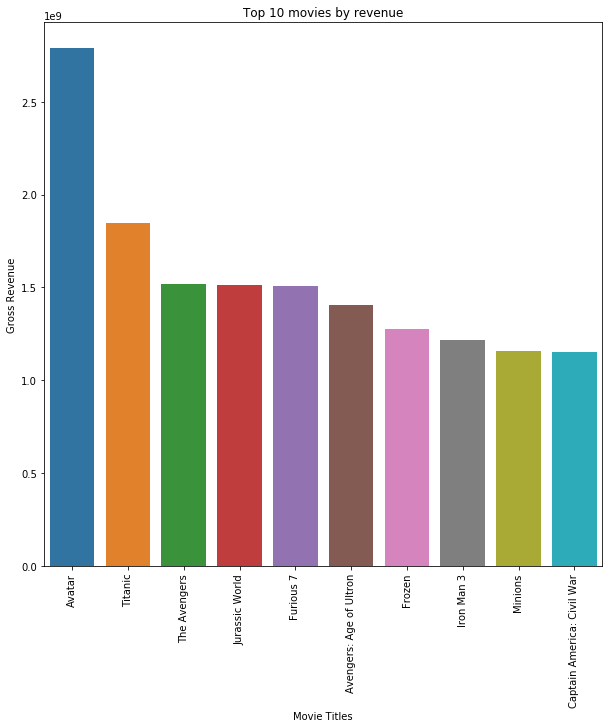

In [23]:
plt.figure(figsize= (10,10))
sns.barplot(x= sorted_movies['original_title'], y = sorted_movies['revenue'])
plt.title('Top 10 movies by revenue')
plt.xticks(rotation = 90)
plt.xlabel('Movie Titles')
plt.ylabel('Gross Revenue')
plt.show()

Now, lets see if there are any correlations bet

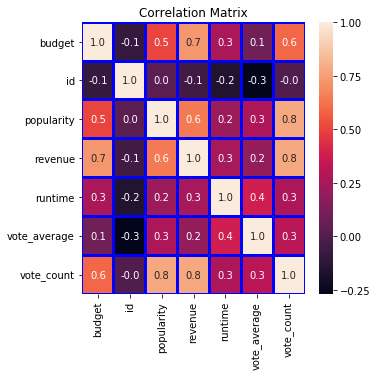

In [11]:
f,ax = plt.subplots( figsize = (5,5))
sns.heatmap(df_movies.corr() , annot = True , linewidths = 2 ,linecolor = 'blue', fmt = '.1f' , ax = ax )
plt.title("Correlation Matrix")
plt.show()

From this correlation matrix we can see:
- popularity correlates with revenue, vote_count
- Revenue correlates with budget, popularity and vote_count

These correlations seem self-explanatory.

Further we can see that the runtime seems to not have strong correlation with any others variables. So we can infer that the runtime of a movie doesnt seem to have much effect.

Also, the vote_average seems to not have a strong correlation with any other variables.

C:\Users\sagar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


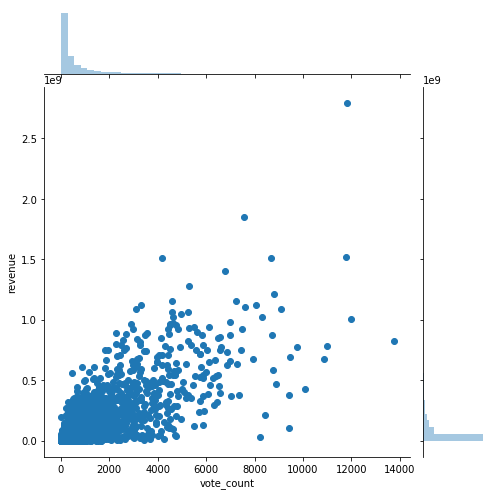

In [12]:
sns.jointplot(x = df_movies['vote_count'], y = df_movies['revenue'], kind = 'scatter', size=7)
plt.show()

C:\Users\sagar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


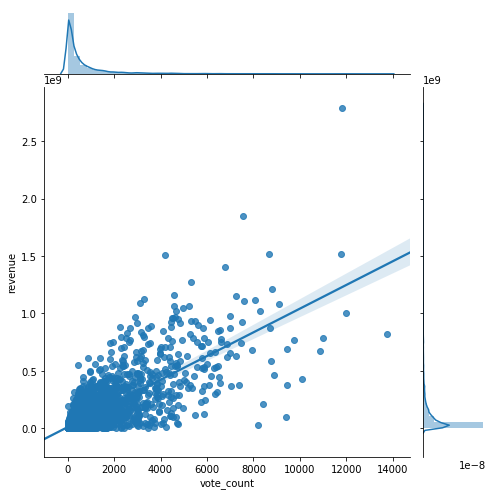

In [13]:
sns.jointplot(x = df_movies['vote_count'], y = df_movies['revenue'], kind = 'reg', size=7)
plt.show()

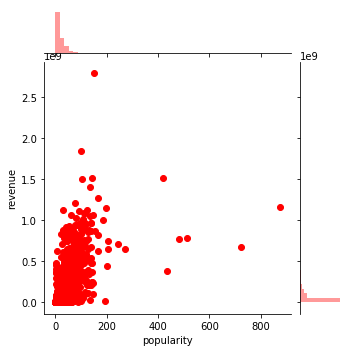

In [14]:
sns.jointplot(x = df_movies['popularity'], y = df_movies['revenue'], kind = 'scatter',color='r', height=5)
plt.show()

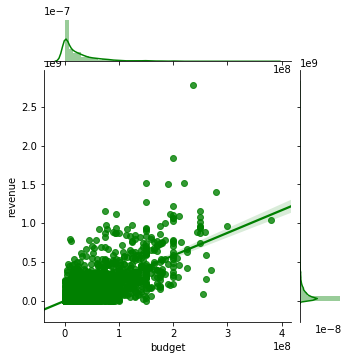

In [15]:
sns.jointplot(x = df_movies['budget'], y = df_movies['revenue'], kind = 'reg',color='g', height=5)
plt.show()

In [16]:
sorted_movies = df_movies.reindex(new_indx)
sorted_movies =  sorted_movies[:100]

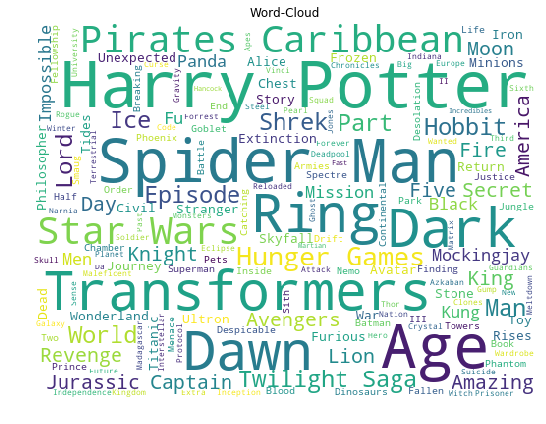

In [20]:
plt.subplots(figsize = (9,9))
wordcloud = WordCloud(
        background_color = "white",
        width = 512 ,
        height = 384).generate(" ".join(sorted_movies['original_title']))
plt.imshow(wordcloud)
plt.title("Word-Cloud")
plt.axis('off')
plt.show()